## This notebook contains the following Topics

1. Importing libraries
2. Interpreting  Dataset
3. Exploratory Data Analysis
4. Treating the Outliers
5. Model Creation

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. **pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS)**:
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines**:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate**:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity**:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon**:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes**:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity**:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability**:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
data = pd.read_csv('./water_potability.csv')
data = data.sample(frac = 1)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2551,7.400239,218.824813,8136.071591,6.286358,310.761160,518.732778,15.186342,50.837013,4.880120,0
2378,5.800034,181.453515,13028.688458,6.106765,374.357784,405.517220,15.773825,35.338133,4.074408,1
1503,5.609025,271.630824,26955.330183,6.772753,296.651564,443.872558,17.048683,72.827392,3.354890,1
80,1.844538,233.764343,28689.595778,7.724432,NaN,410.387264,15.611859,54.299444,5.013463,0
225,5.095766,273.408448,26307.298455,10.219804,380.201498,513.877579,18.272418,61.425187,4.352193,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 2551 to 2815
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data['ph'].fillna(data['ph'].mean(), inplace = True)

In [7]:
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace = True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace = True)

In [8]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


## EDA

### Single Variate

<AxesSubplot:xlabel='Potability', ylabel='count'>

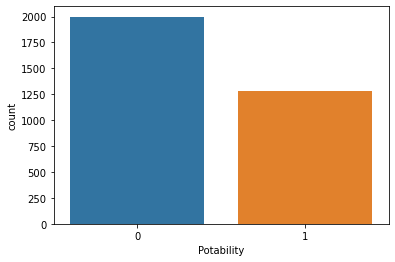

In [10]:
# Portability
sns.countplot(data['Potability'])


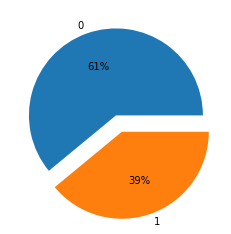

In [11]:
plt.pie(data['Potability'].value_counts(), labels = [0,1], explode = [0,0.2], autopct="%.0f%%")
plt.show()

In [12]:
plt.rcParams['figure.figsize'] = (10,4)

##### Checking the Distribution and Outliers of each column

<AxesSubplot:xlabel='ph'>

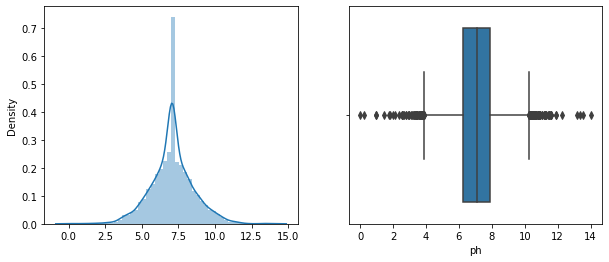

In [13]:
#pH column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['ph'], kde = True, ax = axes[0])
sns.boxplot(x = data['ph'], ax = axes[1])

<AxesSubplot:xlabel='Hardness'>

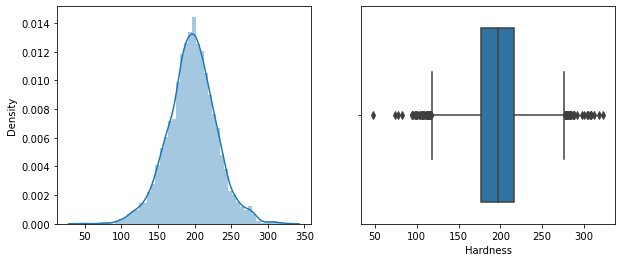

In [14]:
#Hardness Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Hardness'], kde = True, ax = axes[0])
sns.boxplot(x = data['Hardness'], ax = axes[1])

<AxesSubplot:xlabel='Solids'>

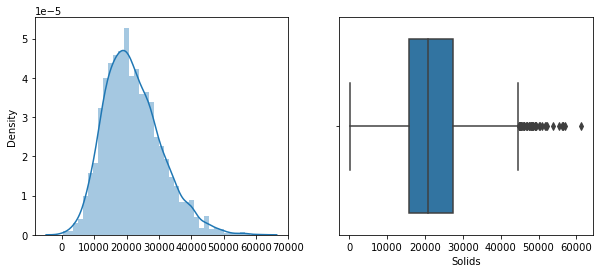

In [15]:
#Solids Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Solids'], kde = True, ax = axes[0])
sns.boxplot(x = data['Solids'], ax = axes[1])

<AxesSubplot:xlabel='Chloramines'>

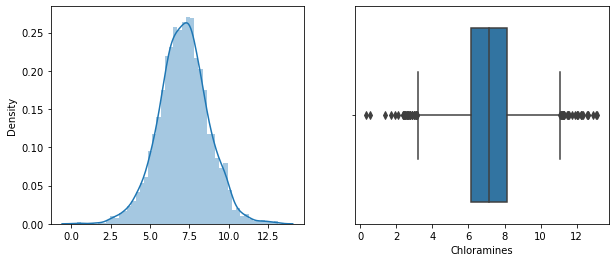

In [16]:
# Chloramines Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Chloramines'], kde = True, ax = axes[0])
sns.boxplot(x = data['Chloramines'], ax = axes[1])

<AxesSubplot:xlabel='Chloramines'>

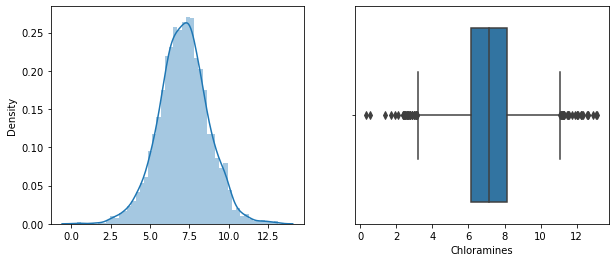

In [17]:
# Chloramines Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Chloramines'], kde = True, ax = axes[0])
sns.boxplot(x = data['Chloramines'], ax = axes[1])

<AxesSubplot:xlabel='Sulfate'>

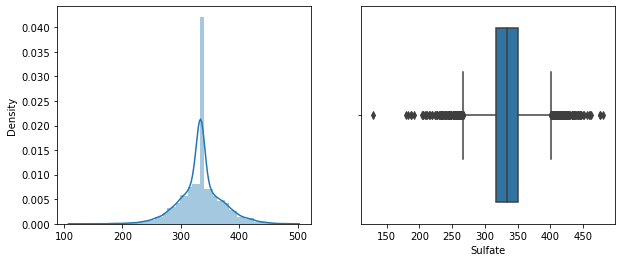

In [18]:
# Sulfate Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Sulfate'], kde = True, ax = axes[0])
sns.boxplot(x = data['Sulfate'], ax = axes[1])

<AxesSubplot:xlabel='Conductivity'>

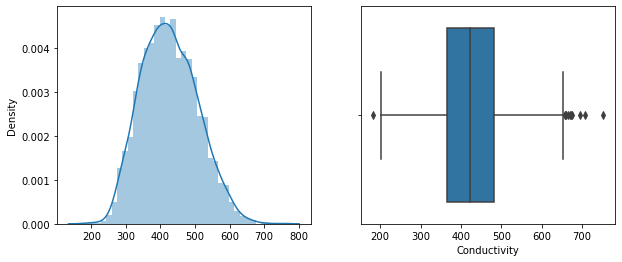

In [19]:
# Conductivity Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Conductivity'], kde = True, ax = axes[0])
sns.boxplot(x = data['Conductivity'], ax = axes[1])

<AxesSubplot:xlabel='Organic_carbon'>

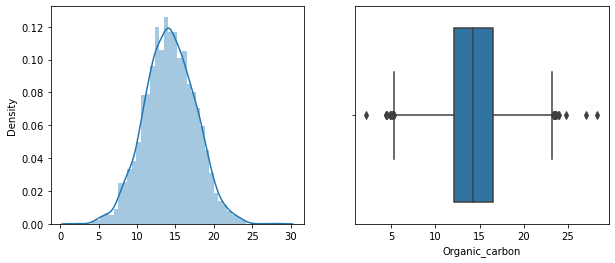

In [20]:
# Organic_Carbon Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Organic_carbon'], kde = True, ax = axes[0])
sns.boxplot(x = data['Organic_carbon'], ax = axes[1])

<AxesSubplot:xlabel='Trihalomethanes'>

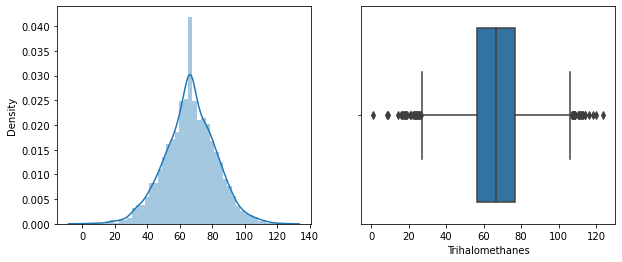

In [21]:
# Trihalomethanes Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Trihalomethanes'], kde = True, ax = axes[0])
sns.boxplot(x = data['Trihalomethanes'], ax = axes[1])

<AxesSubplot:xlabel='Turbidity'>

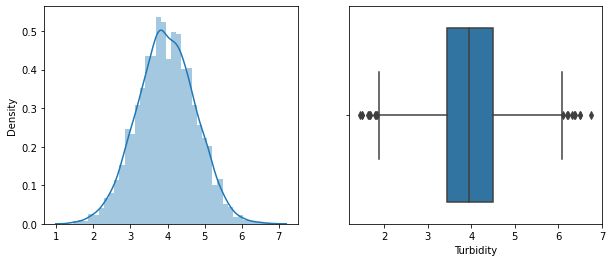

In [22]:
# Turbidity Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Turbidity'], kde = True, ax = axes[0])
sns.boxplot(x = data['Turbidity'], ax = axes[1])

From the Distplot we found that all the columns are normally distributed, but there are outliers present in every column which have to dropped or capped accordingly

### Bivariate 

In [23]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='Potability', ylabel='ph'>

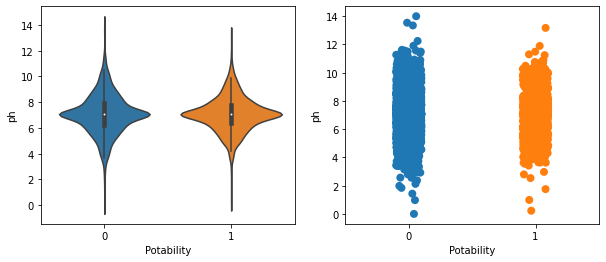

In [24]:
# ph vs Potability
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'ph', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'ph', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

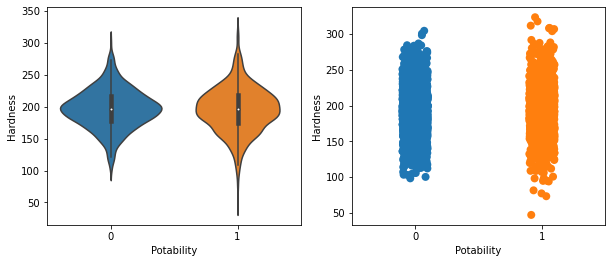

In [25]:
# Potability vs Hardness
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Hardness', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Hardness', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

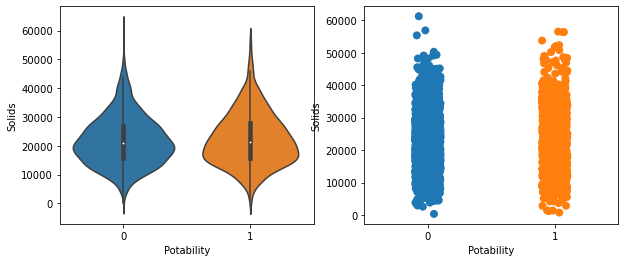

In [26]:
# Potability vs Solids
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Solids', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Solids', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

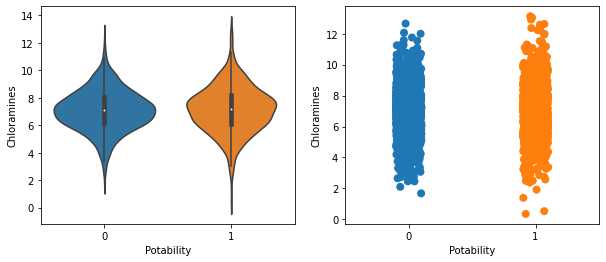

In [27]:
# Potability vs Chloramines
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Chloramines', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Chloramines', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

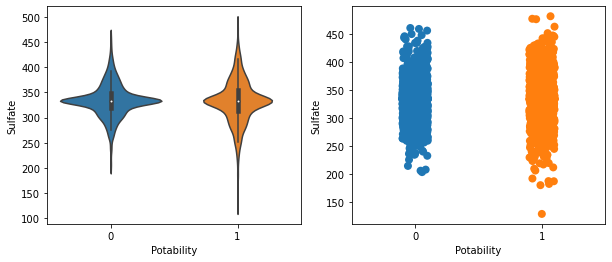

In [28]:
# Potability vs Sulfate
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Sulfate', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Sulfate', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

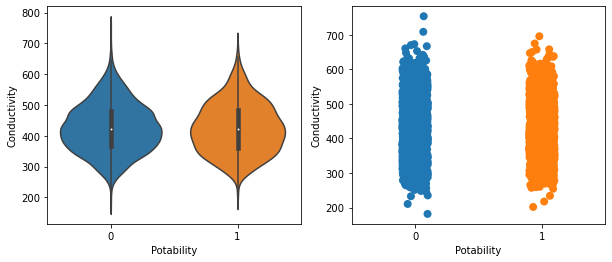

In [29]:
# Potability vs Conductivity
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Conductivity', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Conductivity', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

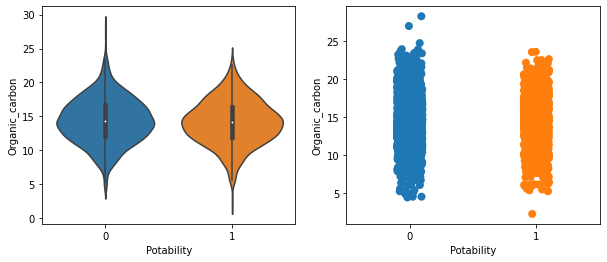

In [30]:
# Potability vs Organic_carbon
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Organic_carbon', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Organic_carbon', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

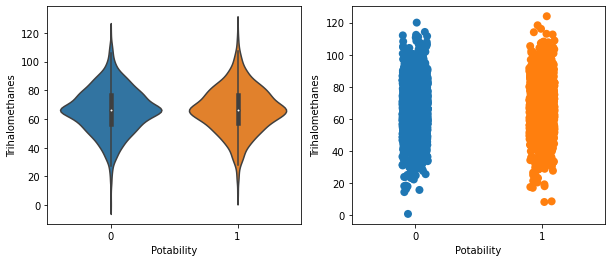

In [31]:
# Potability vs Trihalomethanes
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Trihalomethanes', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Trihalomethanes', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

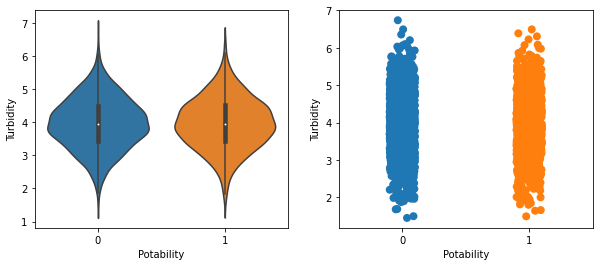

In [32]:
# Potability vs Turbidity
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Turbidity', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Turbidity', x = 'Potability', size = 8, ax = axes[1])

### Multivariate

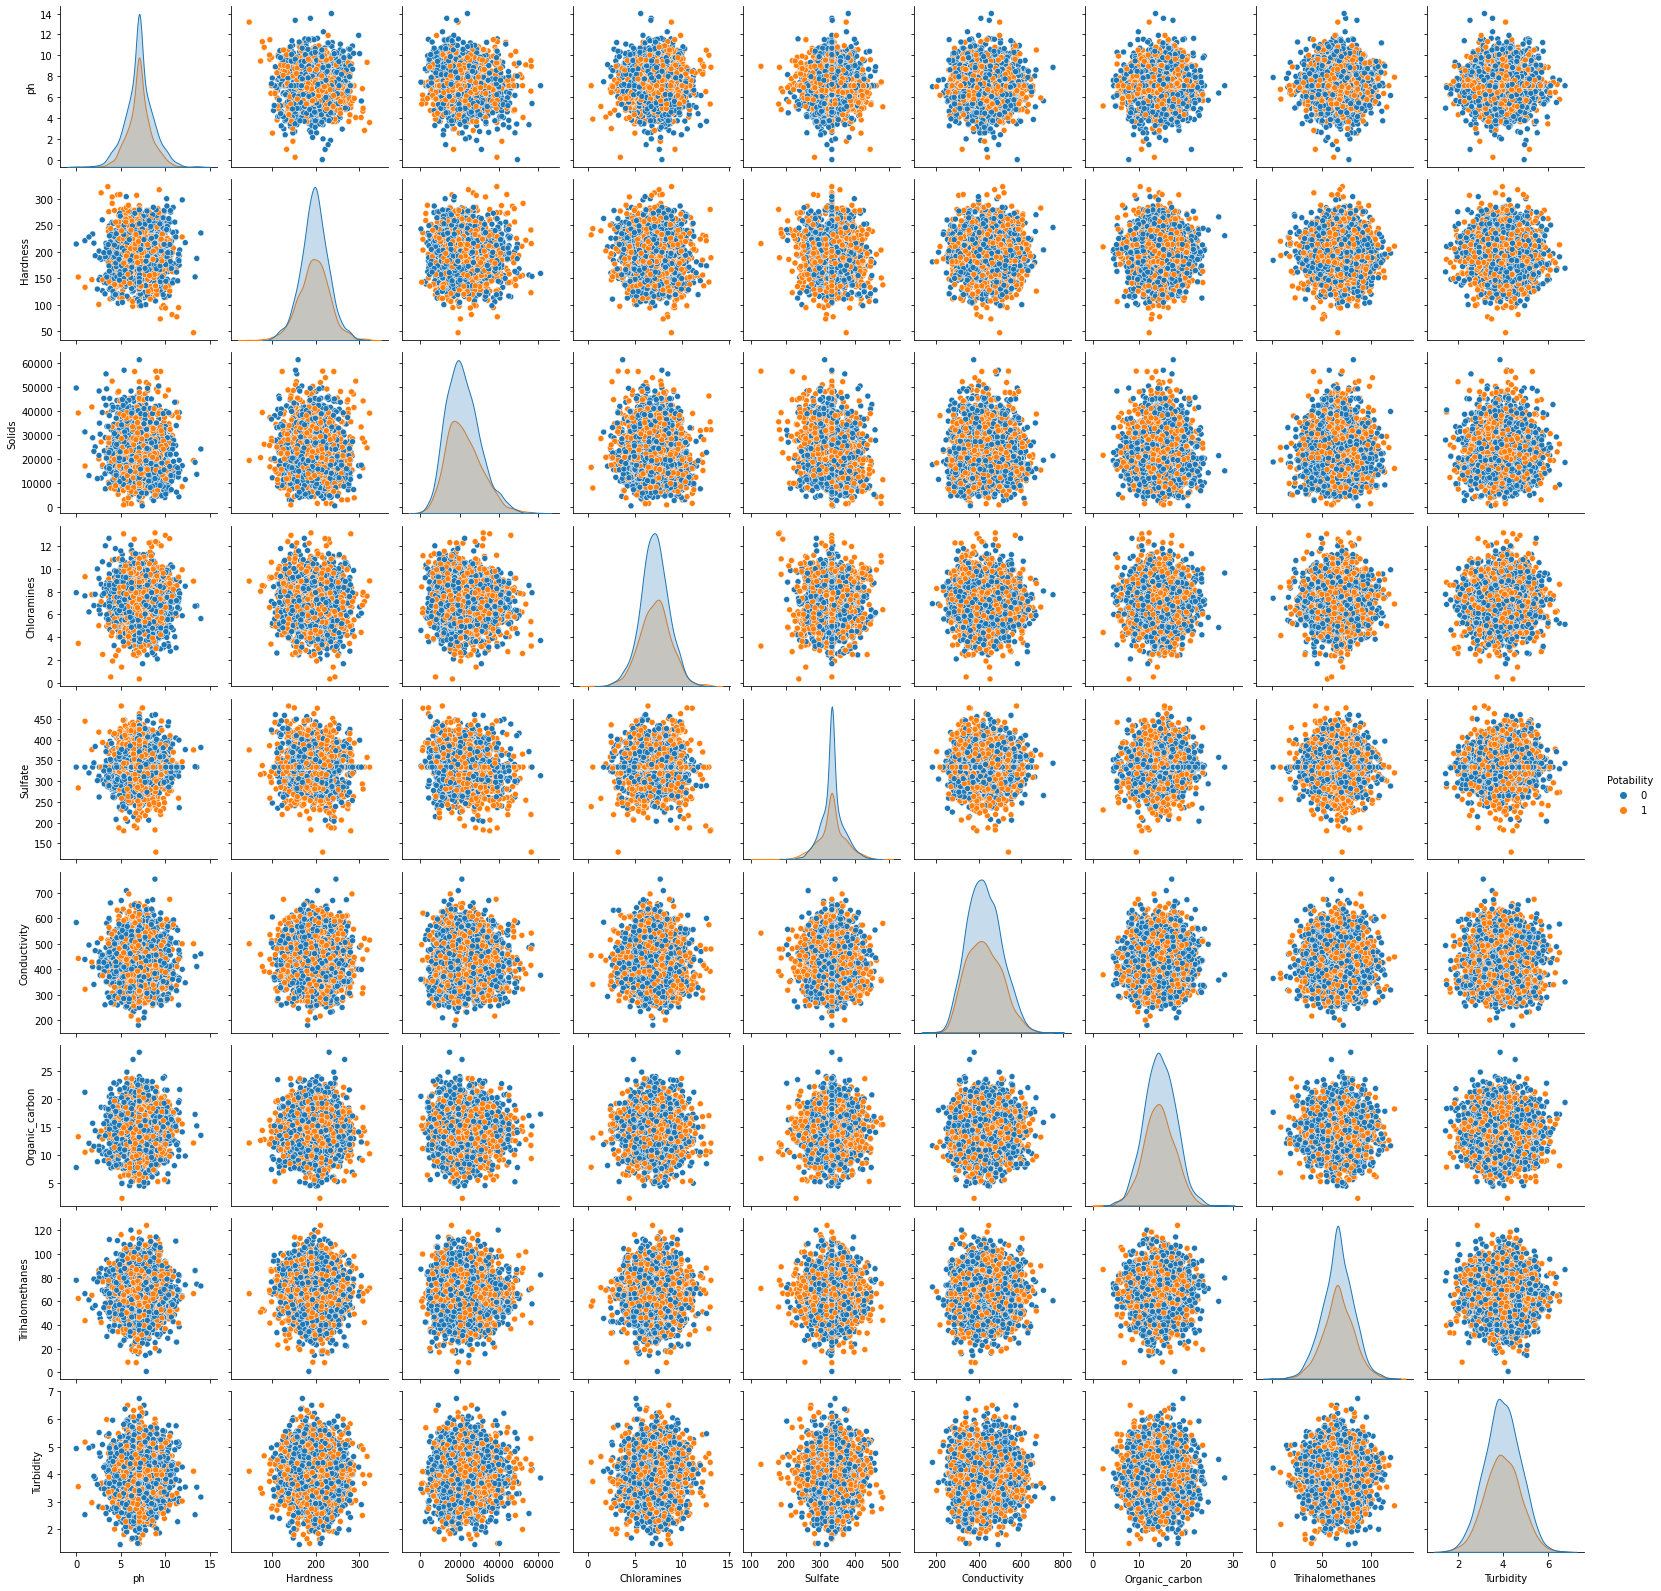

In [33]:
# Pairplot
sns.pairplot(data, hue = 'Potability')

## Treating Outliers


We will use capping to treat the outliers 

In [34]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [35]:
ph_lower = np.percentile(data['ph'], [1])
ph_upper = np.percentile(data['ph'], [99])
data['ph'][data['ph'].values < ph_lower] = ph_lower
data['ph'][data['ph'].values > ph_upper] = ph_upper

In [36]:
# Hardness
lower = np.percentile(data['Hardness'], [1])
upper = np.percentile(data['Hardness'], [99])
data['Hardness'][data['Hardness'].values < lower] = lower
data['Hardness'][data['Hardness'].values > upper] = upper

# Solids
lower = np.percentile(data['Solids'], [1])
upper = np.percentile(data['Solids'], [99])
data['Solids'][data['Solids'].values < lower] = lower
data['Solids'][data['Solids'].values > upper] = upper

# Chloramines
lower = np.percentile(data['Chloramines'], [1])
upper = np.percentile(data['Chloramines'], [99])
data['Chloramines'][data['Chloramines'].values < lower] = lower
data['Chloramines'][data['Chloramines'].values > upper] = upper

# Sulfate
lower = np.percentile(data['Sulfate'], [1])
upper = np.percentile(data['Sulfate'], [99])
data['Sulfate'][data['Sulfate'].values < lower] = lower
data['Sulfate'][data['Sulfate'].values > upper] = upper

# Conductivity
lower = np.percentile(data['Conductivity'], [1])
upper = np.percentile(data['Conductivity'], [99])
data['Conductivity'][data['Conductivity'].values < lower] = lower
data['Conductivity'][data['Conductivity'].values > upper] = upper

# Organic_carbon
lower = np.percentile(data['Organic_carbon'], [1])
upper = np.percentile(data['Organic_carbon'], [99])
data['Organic_carbon'][data['Organic_carbon'].values < lower] = lower
data['Organic_carbon'][data['Organic_carbon'].values > upper] = upper

# Trihalomethanes
lower = np.percentile(data['Trihalomethanes'], [1])
upper = np.percentile(data['Trihalomethanes'], [99])
data['Trihalomethanes'][data['Trihalomethanes'].values < lower] = lower
data['Trihalomethanes'][data['Trihalomethanes'].values > upper] = upper

# Turbidity
lower = np.percentile(data['Turbidity'], [1])
upper = np.percentile(data['Turbidity'], [99])
data['Turbidity'][data['Turbidity'].values < lower] = lower
data['Turbidity'][data['Turbidity'].values > upper] = upper

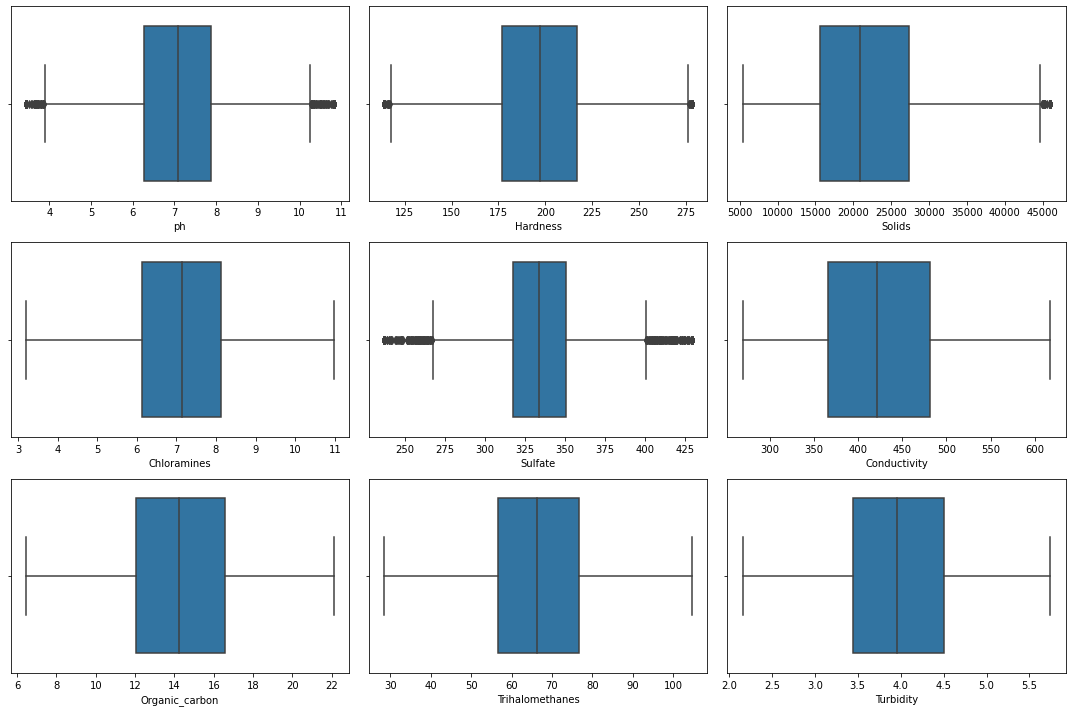

In [37]:
plt.figure(figsize = (15,10), tight_layout = True)
for i, feature in enumerate(data.columns):
    if feature != 'Potability':
        plt.subplot(3,3,i+1)
        sns.boxplot(data = data, x =feature)


## Feature Engineering

<AxesSubplot:>

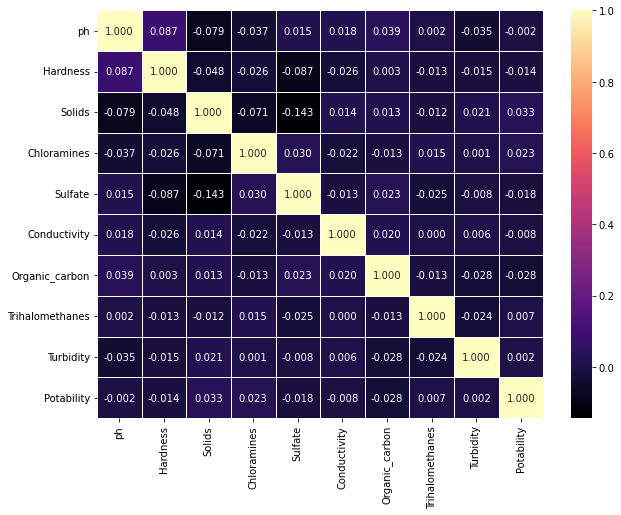

In [38]:
# Checking the correlation between columns
plt.rcParams['figure.figsize']  = (10,7.5)
matrix = data.corr()
sns.heatmap(matrix, fmt = ".3f", linewidths = 0.7, cmap = "magma" ,annot = True)

In [39]:
X = data.drop(['Potability'], axis = 1)
Y = data['Potability']

# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)

## Creating Models

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

### SVC

In [42]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(xtrain, ytrain)

SVC()

In [43]:
ypred = svc_model.predict(xtest)
print(f'Model Score: {svc_model.score(xtest,ytest)}')
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}')

Model Score: 0.6524390243902439
Accuracy Score: 0.6524390243902439
Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.92      0.76       385
           1       0.71      0.27      0.39       271

    accuracy                           0.65       656
   macro avg       0.68      0.60      0.57       656
weighted avg       0.67      0.65      0.61       656



In [44]:
param_grid = {'C' : (np.arange(0.1,1,0.1)) , 'kernel' : ['linear'],
              'C' : (np.arange(0.1,1,0.1)), 'gamma' : [0.1,0.2,0.3,0.4,0.5], 'kernel' : ['rbf'],
              'C' : (np.arange(0.1,1,0.1)), 'gamma' : [0.1,0.2,0.3,0.4,0.5], 'degree' : [2,3,4], 'kernel' : ['poly']}

In [ ]:
model = SVC()
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(xtrain, ytrain)

In [ ]:
grid_search.best_params_

In [ ]:
ypred = grid_search.predict(xtest)
print(f'Model Score: {grid_search.score(xtest,ytest)}')
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}')

In [ ]:
print(ypred)

In [ ]:
matrix = confusion_matrix(ytest, ypred)
matrix

### RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 9, 
                               max_features = 7)
model.fit(xtrain, ytrain)

In [ ]:
ypred = model.predict(xtest)
print(f'Model Score: {model.score(xtest,ytest)}')
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}\n')
print(f'Confusion Matrix \n {confusion_matrix(ytest, ypred)}')

### XGBoost

In [ ]:
model = XGBRegressor()
model.fit(xtrain, ytrain)

In [ ]:
ypred = model.predict(xtest)
ypred = [ 1 if y>=0.5 else 0 for y in ypred ]
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}\n')
print(f'Confusion Matrix \n {confusion_matrix(ytest, ypred)}')